In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This data will be used to derive attrition rate


In [ ]:
emp_train = pd.read_csv("empTrain.csv")
emp_test = pd.read_csv("Test.csv")

Visualising Data

Preprocess data

In [ ]:
emp_test.fillna(emp_test.mean(), inplace=True)
emp_test = pd.get_dummies(emp_test , columns = ['Relationship_Status'])
emp_test = pd.get_dummies(emp_test , columns = ['Hometown'])
emp_test = pd.get_dummies(emp_test , columns = ['Unit'])
emp_test = pd.get_dummies(emp_test , columns = ['Decision_skill_possess'])
emp_test = pd.get_dummies(emp_test , columns = ['Compensation_and_Benefits'])

In [ ]:
emp_test = pd.get_dummies(emp_test , columns = ['Gender'])

In [ ]:
emp_test_df = pd.DataFrame(emp_test)

In [ ]:
emp_test_df.to_csv(r'empTest.csv')

X and Y

In [ ]:
X= emp_train
X = X.drop(['Employee_ID','Attrition_rate'], axis = 1)
X.head()

In [ ]:
X = pd.read_csv("emptANN.csv")

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

In [ ]:
X_scale.shape

(7000, 46)

Model - ANN

In [ ]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
model = Sequential([
    Dense(12, activation='tanh', input_shape=( 46 ,)),
    Dense(15, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_scale, y,
          batch_size=70, epochs=10000, validation_split=0.2)

Streaming output truncated to the last 5000 lines.
5600/5600 [==============================] - 0s 23us/step - loss: 0.4604 - accuracy: 7.1429e-04 - val_loss: 0.5275 - val_accuracy: 0.0000e+00
Epoch 7502/10000
5600/5600 [==============================] - 0s 20us/step - loss: 0.4604 - accuracy: 7.1429e-04 - val_loss: 0.5275 - val_accuracy: 0.0000e+00
Epoch 7503/10000
5600/5600 [==============================] - 0s 20us/step - loss: 0.4604 - accuracy: 7.1429e-04 - val_loss: 0.5277 - val_accuracy: 0.0000e+00
Epoch 7504/10000
5600/5600 [==============================] - 0s 21us/step - loss: 0.4604 - accuracy: 7.1429e-04 - val_loss: 0.5279 - val_accuracy: 0.0000e+00
Epoch 7505/10000
5600/5600 [==============================] - 0s 26us/step - loss: 0.4604 - accuracy: 7.1429e-04 - val_loss: 0.5278 - val_accuracy: 0.0000e+00
Epoch 7506/10000
5600/5600 [==============================] - 0s 21us/step - loss: 0.4604 - accuracy: 7.1429e-04 - val_loss: 0.5277 - val_accuracy: 0.0000e+00
Epoch 7507/1

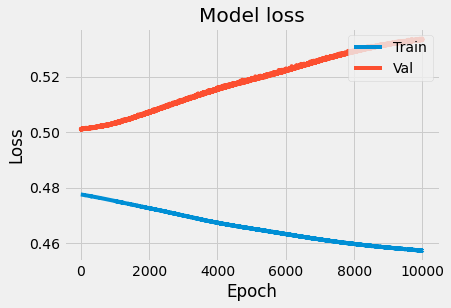

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Testing on X

In [ ]:
X_test= emp_test
X_test = X_test.drop(['Employee_ID'], axis = 1)
X_test.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Gender_F,Gender_M
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale_test = min_max_scaler.fit_transform(X_test)
X_scale_test.shape

(3000, 46)

In [ ]:
#Make a prediction & print the actual values
prediction = model.predict(X_scale_test)
print(prediction)

[[0.36957425]
 [0.25127226]
 [0.1968115 ]
 ...
 [0.14868799]
 [0.18216863]
 [0.10965168]]


In [ ]:
ANN_pred = pd.DataFrame(prediction)

In [ ]:
ANN_pred.to_csv(r'submit4.csv')